Clear project data

Include  packages

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:

pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #scikit-learn


Load data

In [6]:
data = pd.read_csv('./data/student_payment_bi_export_20251005_215433.csv')

Show data

In [7]:
data.head()

,name,last_name,type_document_id,document_id,email,phone,student_state,headquarter_name,amount_1_1,amount_1_10,...,receipt_number_3_3,receipt_number_3_4,receipt_number_3_5,receipt_number_3_6,receipt_number_3_7,receipt_number_3_8,receipt_number_3_9,state_1,state_2,state_3
0,Melania,Abascal,TI,10965138,amaya01@example.com,3359154708,active,Sede Centro,192480.47,105899.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,active,NaN,NaN
1,Brunilda,Sanabria,TI,13176186,telmoespanol@example.com,+57 325 436 5564,active,Sede Albacete,170952.60,256132.30,...,REC-376218,REC-957987,REC-402252,REC-724284,REC-901996,REC-125853,REC-452088,expired,active,active
2,Josep,Benet,CE,15134794,dcabanas@example.net,3380526202,active,Sede Navarra,291224.69,61635.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,expired,expired,NaN
3,Lourdes,Dalmau,CE,16095815,ncastell@example.net,+57 338 156 1125,active,Sede Ourense,60234.38,182733.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,active,active,NaN
4,Nicolasa,Sobrino,CC,16788532,marisol79@example.net,+57 315 228 4362,active,Sede Ourense,196992.44,111907.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,active,expired,NaN


Verify structure

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 131 entries, name to state_3
dtypes: float64(30), int64(1), object(100)
memory usage: 82.0+ KB


Stadistics

In [9]:
data.describe()

,document_id,amount_1_1,amount_1_10,amount_1_2,amount_1_3,amount_1_4,amount_1_5,amount_1_6,amount_1_7,amount_1_8,...,amount_3_1,amount_3_10,amount_3_2,amount_3_3,amount_3_4,amount_3_5,amount_3_6,amount_3_7,amount_3_8,amount_3_9
count,8.000000e+01,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,5.839253e+07,160249.734875,170942.741500,183994.307750,178664.558875,155341.455500,174844.378125,169764.073250,186820.747750,194450.381125,...,182580.780000,138544.212400,172416.940800,195869.47920,191885.049200,162790.706800,153008.621200,193442.093200,175936.906000,159624.910800
std,2.449499e+07,78693.441843,71806.611881,68592.324281,71414.958068,69789.064441,78546.952135,65853.978647,69365.083899,75356.281560,...,83936.505694,72717.089043,79483.456668,53071.68374,83035.604686,75591.005266,71331.011772,73639.306845,77951.915745,77714.841599
min,1.096514e+07,50383.990000,50741.450000,51123.690000,59154.880000,52340.160000,54247.140000,57444.700000,50949.100000,52053.980000,...,60450.130000,53262.060000,55735.240000,94019.36000,60255.070000,60976.210000,62281.620000,52600.270000,63298.680000,56327.900000
25%,4.146164e+07,91783.237500,104621.317500,131860.495000,116930.205000,95763.067500,100577.440000,120390.452500,125020.172500,127999.287500,...,104000.930000,90570.000000,98982.430000,174691.33000,115352.760000,94328.650000,91304.720000,147342.800000,95154.270000,89432.900000
50%,5.924103e+07,140473.925000,171348.550000,186177.370000,192390.925000,141446.695000,168739.250000,170080.275000,199349.405000,208849.365000,...,195360.490000,122581.450000,164009.920000,201116.79000,199275.840000,154868.120000,137337.850000,191418.220000,185459.960000,140650.960000
75%,7.715494e+07,227570.955000,229601.560000,239201.075000,237375.430000,210591.612500,247591.160000,228166.170000,247154.372500,265648.792500,...,258117.310000,184275.260000,238320.690000,226778.61000,262955.330000,226407.290000,208077.480000,256521.080000,233646.540000,222648.890000
max,9.991341e+07,299325.790000,293627.800000,293657.240000,298963.890000,297851.320000,297321.760000,297565.890000,298647.980000,296361.010000,...,295995.210000,291514.980000,298972.250000,288597.29000,298686.290000,297503.440000,275775.890000,299822.730000,292347.580000,297849.710000


Get objects

In [10]:
data.describe(include=['O'])

,name,last_name,type_document_id,email,phone,student_state,headquarter_name,concept_1_1,concept_1_10,concept_1_2,...,receipt_number_3_3,receipt_number_3_4,receipt_number_3_5,receipt_number_3_6,receipt_number_3_7,receipt_number_3_8,receipt_number_3_9,state_1,state_2,state_3
count,80,80,80,80,80,80,80,80,80,80,...,25,25,25,25,25,25,25,80,54,25
unique,77,79,4,80,80,3,10,10,10,10,...,25,25,25,25,25,25,25,3,3,3
top,Abraham,Torralba,CC,amaya01@example.com,3359154708,active,Sede Centro,Recargo por mora,Descuento hermanos,Recargo por mora,...,REC-376218,REC-957987,REC-402252,REC-724284,REC-901996,REC-125853,REC-452088,active,active,active
freq,2,2,22,1,1,71,12,14,13,12,...,1,1,1,1,1,1,1,53,38,21


In [11]:
data.describe(include=['object'])

,name,last_name,type_document_id,email,phone,student_state,headquarter_name,concept_1_1,concept_1_10,concept_1_2,...,receipt_number_3_3,receipt_number_3_4,receipt_number_3_5,receipt_number_3_6,receipt_number_3_7,receipt_number_3_8,receipt_number_3_9,state_1,state_2,state_3
count,80,80,80,80,80,80,80,80,80,80,...,25,25,25,25,25,25,25,80,54,25
unique,77,79,4,80,80,3,10,10,10,10,...,25,25,25,25,25,25,25,3,3,3
top,Abraham,Torralba,CC,amaya01@example.com,3359154708,active,Sede Centro,Recargo por mora,Descuento hermanos,Recargo por mora,...,REC-376218,REC-957987,REC-402252,REC-724284,REC-901996,REC-125853,REC-452088,active,active,active
freq,2,2,22,1,1,71,12,14,13,12,...,1,1,1,1,1,1,1,53,38,21


visualise size dataset

In [12]:
data.shape

(80, 131)

In [14]:
# I'M WORKING HERE
# Convert email to category(kind string), more efficient to best performance
data['email'] = data['email'].astype('category')
data['email'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 80 entries, 0 to 79
Series name: email
Non-Null Count  Dtype   
--------------  -----   
80 non-null     category
dtypes: category(1)
memory usage: 2.9 KB


Finding Outliers - Using graphics

/var/folders/cm/3twsr_7954j7r3xfp1_yd7qc0000gn/T/ipykernel_53324/2441819384.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 1))


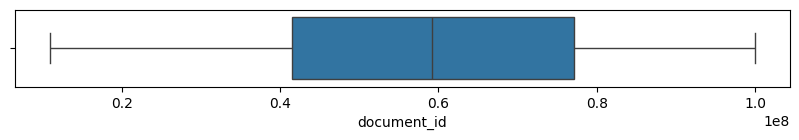

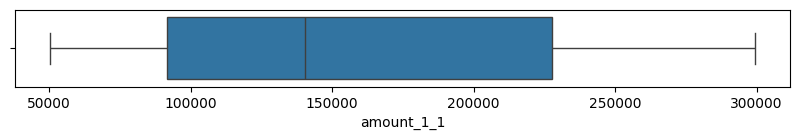

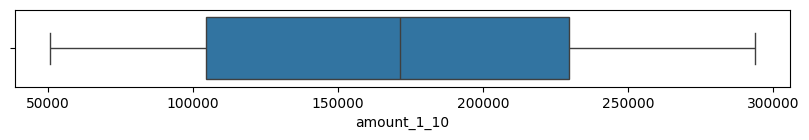

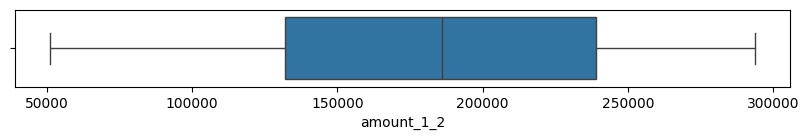

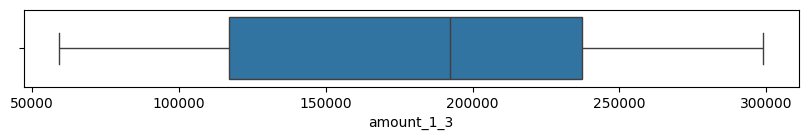

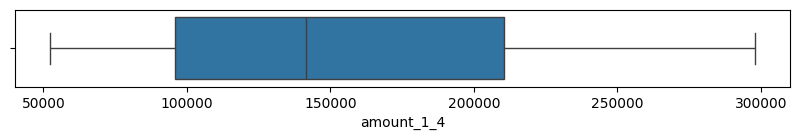

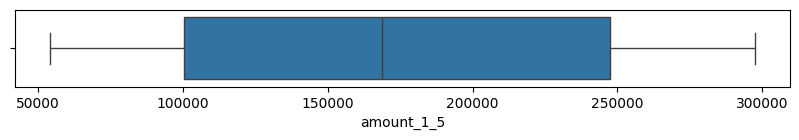

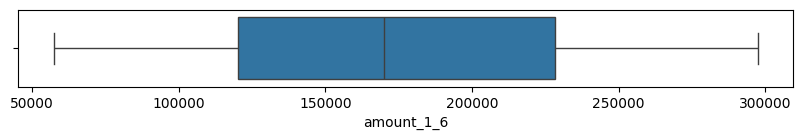

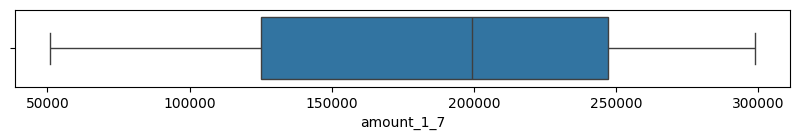

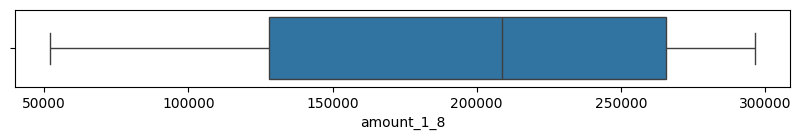

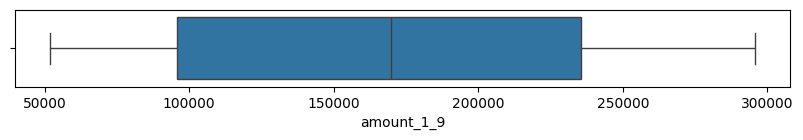

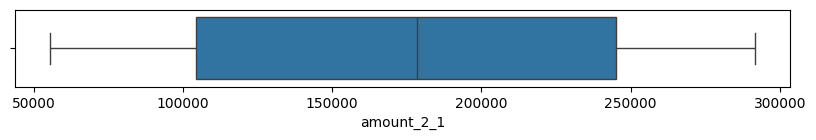

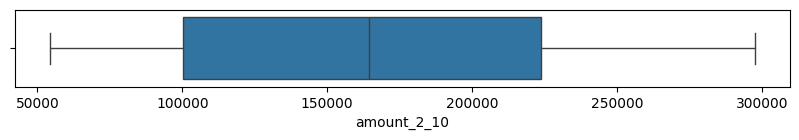

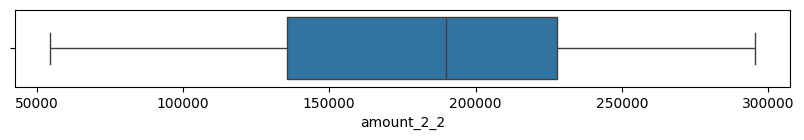

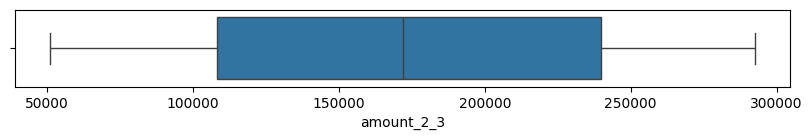

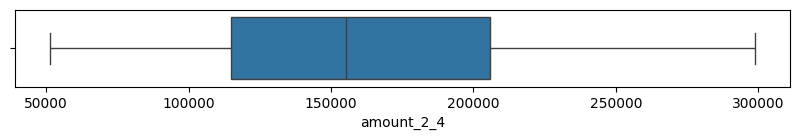

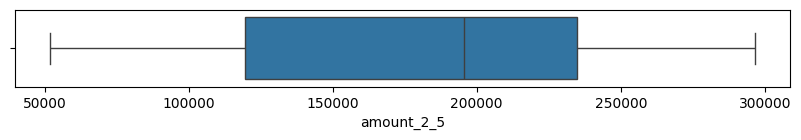

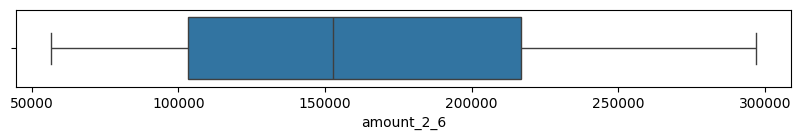

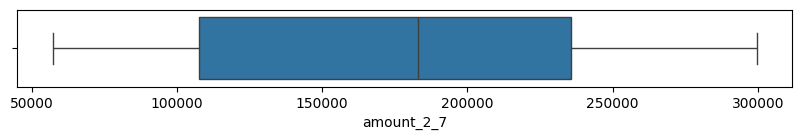

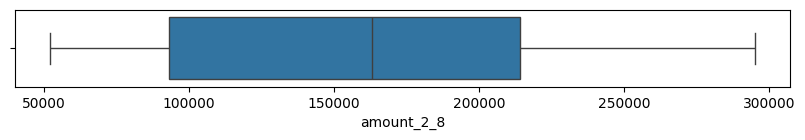

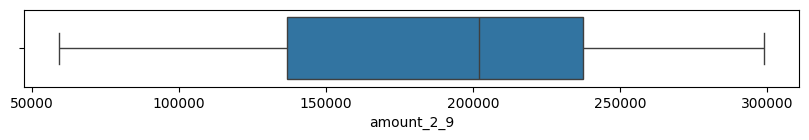

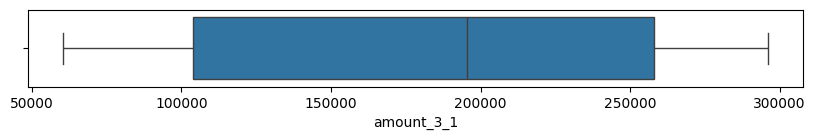

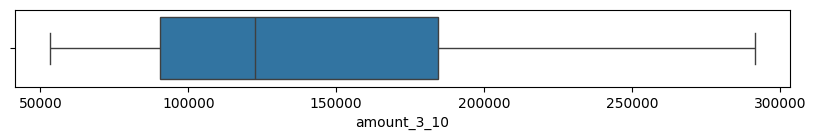

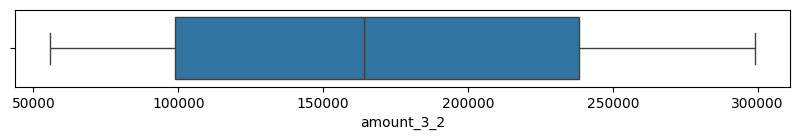

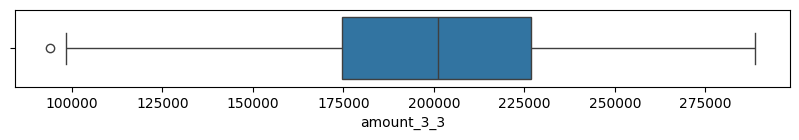

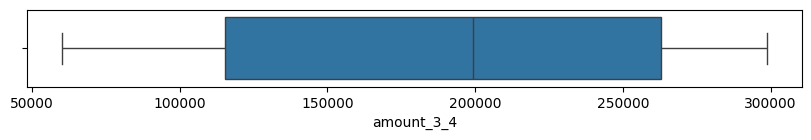

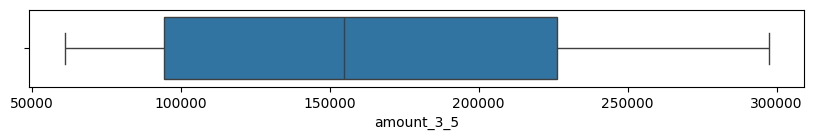

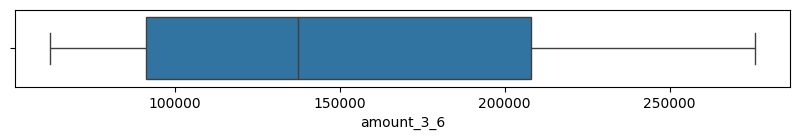

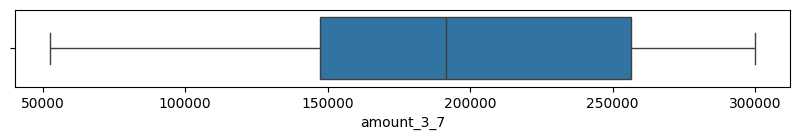

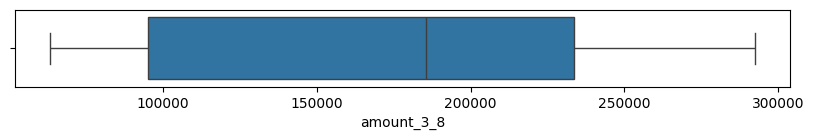

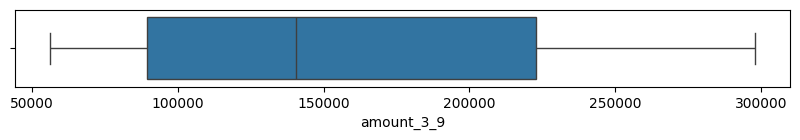

In [15]:
# number are including all the columns with numeric data
cols = data.select_dtypes(include=['number']).columns

for column in cols:
  plt.figure(figsize=(10, 1))
  sns.boxplot(data=data[cols], x=column)


Outliers - Calc

IRQ = rango interquartilico

----Q1(25%)----Q2(50%)----Q3(75%)----

In [16]:
outliers = {}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  # Take Q2 && Q3
  IRQ = Q3 - Q1
  # Calculate the limits
  lower_limit = Q1 - 1.5 * IRQ
  upper_limit = Q3 + 1.5 * IRQ
  # Find outliers
  outliers[col] = data[col][(data[col] < lower_limit) | (data[col] > upper_limit)]
  print(f'{col}: {len(outliers[col])
  }')



document_id: 0
amount_1_1: 0
amount_1_10: 0
amount_1_2: 0
amount_1_3: 0
amount_1_4: 0
amount_1_5: 0
amount_1_6: 0
amount_1_7: 0
amount_1_8: 0
amount_1_9: 0
amount_2_1: 0
amount_2_10: 0
amount_2_2: 0
amount_2_3: 0
amount_2_4: 0
amount_2_5: 0
amount_2_6: 0
amount_2_7: 0
amount_2_8: 0
amount_2_9: 0
amount_3_1: 0
amount_3_10: 0
amount_3_2: 0
amount_3_3: 0
amount_3_4: 0
amount_3_5: 0
amount_3_6: 0
amount_3_7: 0
amount_3_8: 0
amount_3_9: 0


Desviación standar

In [17]:
# Desviación standar
outliers2 = {}

for col in cols:
  mean = data[col].mean()
  std = data[col].std()
  # Calculate the limits
  lower_limit = mean - 3 * std
  upper_limit = mean + 3 * std
  # Find outliers
  outliers2[col] = data[col][(data[col] < lower_limit) | (data[col] > upper_limit)]
  print(f'{col}: {len(outliers2[col])}')







document_id: 0
amount_1_1: 0
amount_1_10: 0
amount_1_2: 0
amount_1_3: 0
amount_1_4: 0
amount_1_5: 0
amount_1_6: 0
amount_1_7: 0
amount_1_8: 0
amount_1_9: 0
amount_2_1: 0
amount_2_10: 0
amount_2_2: 0
amount_2_3: 0
amount_2_4: 0
amount_2_5: 0
amount_2_6: 0
amount_2_7: 0
amount_2_8: 0
amount_2_9: 0
amount_3_1: 0
amount_3_10: 0
amount_3_2: 0
amount_3_3: 0
amount_3_4: 0
amount_3_5: 0
amount_3_6: 0
amount_3_7: 0
amount_3_8: 0
amount_3_9: 0


<Axes: xlabel='amount_1_1', ylabel='Count'>

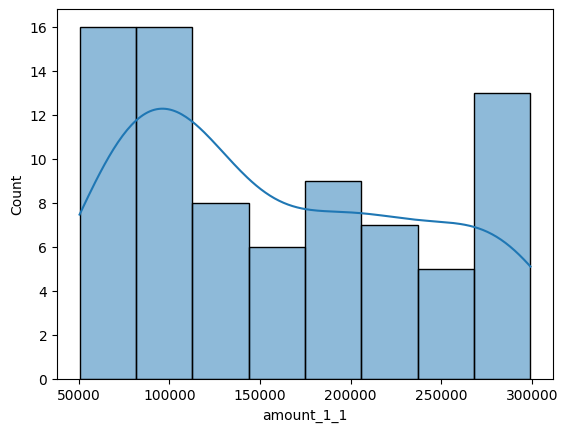

In [ ]:
# Plot a histogram of the 'amount_1_1' column to visualize the distribution of transaction amounts
# The 'kde=True' argument enables the plotting of the kernel density estimate of the underlying distribution
sns.histplot(data=data, x='amount_1_1', kde=True)

<Axes: xlabel='amount_1_10', ylabel='Count'>

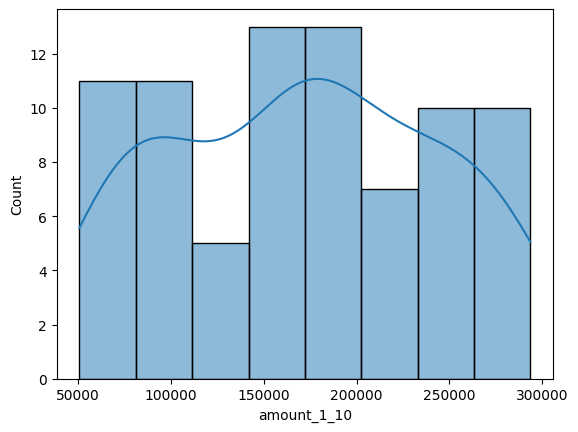

In [20]:
sns.histplot(data=data, x='amount_1_10', kde=True)

Validate null values with .isna()

In [21]:
data.isna()

,name,last_name,type_document_id,document_id,email,phone,student_state,headquarter_name,amount_1_1,amount_1_10,...,receipt_number_3_3,receipt_number_3_4,receipt_number_3_5,receipt_number_3_6,receipt_number_3_7,receipt_number_3_8,receipt_number_3_9,state_1,state_2,state_3
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,True
76,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
77,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,True
78,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,True,True


Count null values

In [23]:
"""
Returns the count of missing values in the DataFrame.

This function returns the number of missing values in each column of the DataFrame.
Missing values are represented as NaN (Not a Number) values.

Parameters
----------

None

Returns
-------
int
    The count of missing values in the DataFrame.

Examples
--------
data.isna().sum()
# Returns the count of missing values in the DataFrame.
"""
data.isna().sum()

name                   0
last_name              0
type_document_id       0
document_id            0
email                  0
                      ..
receipt_number_3_8    55
receipt_number_3_9    55
state_1                0
state_2               26
state_3               55
Length: 131, dtype: int64

Delete null values

In [24]:
# inplace=True to modify the original dataframe
# inplace=False to create a new dataframe
# example:
# data_new = data.drop('receipt_number_3_8', axis=1, inplace=False)

# axis=1 to drop the column
# axis=0 to drop the row
data.drop('receipt_number_3_8', axis=1, inplace=True)

In [26]:
data['receipt_number_3_8'].info()

KeyError: 'receipt_number_3_8'

Impute data

In [29]:
"""
This code block uses the SimpleImputer class from scikit-learn to
replace null values in the 'amount_1_1' column of the data
DataFrame with the median value of the column.

First, it prints the initial median of the column. Then, it
fits the imputer to the data and transforms it. The result is
stored in a new DataFrame called 'output'.

Finally, it prints the number of null values in the new
DataFrame and the median of the new DataFrame.
"""

impute = SimpleImputer(strategy='median')

print('Initial median: ', data['amount_1_1'].median())

output = impute.fit_transform(data[['amount_1_1']])
output = pd.DataFrame(output)

print('\nNull into new dataframe: ', output.isna().sum())
print('\nMedian for new dataframe: ', output.median())

Initial median:  140473.925

Null into new dataframe:  0    0
dtype: int64

Median for new dataframe:  0    140473.925
dtype: float64


In [31]:
"""
This code uses the SimpleImputer from sklearn.impute to fill missing values in the 'state_1' column of the dataframe 'data' with the median value of the column.
"""

impute = SimpleImputer(strategy='constant', fill_value='S')

print('Initial median: ', data['state_1'].value_counts())

# fit and transform the data
output = impute.fit_transform(data[['state_2']])
output = pd.DataFrame(output)

print('\nNull into new dataframe: ', output.isna().sum())
print('\nMedian for new dataframe: ', output.value_counts())

Initial median:  state_1
active       53
expired      20
cancelled     7
Name: count, dtype: int64

Null into new dataframe:  0    0
dtype: int64

Median for new dataframe:  0        
active       38
S            26
expired      11
cancelled     5
Name: count, dtype: int64
